<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_105/blob/main/Reto_Entrega1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reto-> Entrega 1 (16/11)

Portada con datos generales: Nombre de la entrega, tu nombre, matrícula, materia, profesor, fecha

Nombres:


*   Juan Pablo Acosta López - A01794035
*   Yocelín Juárez Arroyo- A00819828

Materia Ciencia y analítica de datos


Profesor tutor: Victoria Guerrero Orozco

Fecha 15/11/2022

Ciencia y análitica de datos

In [20]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.

import requests, zipfile
from io import BytesIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import power_transform
from sklearn.impute import SimpleImputer
from sklearn.feature_selection._base import SelectorMixin
from sklearn.feature_extraction.text import _VectorizerMixin
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt 
import seaborn as sns
import math as math

In [21]:
#This method Imports zip directly
# importing necessary modules

print('Downloading started')

#Defining the zip file URL
url = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'

# Split URL to get the file name
filename = url.split('/')[-1]

# Downloading the file by sending the request to the URL
#Para poder usar request necesitamos la libreria import requests, zipfile
from io import BytesIO

req = requests.get(url)
print('Downloading Completed')

# extracting the zip file contents
zipfile= zipfile.ZipFile(BytesIO(req.content))
zipfile.extractall('/content/sample_data/Calidad_del_agua')
Rawdf = pd.read_csv('/content/sample_data/Calidad_del_agua/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv',sep=',', encoding_errors='ignore')
df = Rawdf

pd.set_option('display.max_columns', 100)


In [22]:
pd.set_option('display.max_rows', 100)
df

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,231.045,Alta,2350.0,Dudosa para riego,NaN,1545.8,Cultivos con manejo especial,Ligeramente salobres,<0.2,Baja,752.096,Muy dura e indeseable usos industrial y domestic

In [23]:
Rawdf.isnull().any()

for col in df.columns:
    print('La columna: ',col,'tiene ',Rawdf[col].isna().sum(), 'valores nulos en total')

La columna:  CLAVE tiene  0 valores nulos en total
La columna:  SITIO tiene  0 valores nulos en total
La columna:  ORGANISMO_DE_CUENCA tiene  0 valores nulos en total
La columna:  ESTADO tiene  0 valores nulos en total
La columna:  MUNICIPIO tiene  0 valores nulos en total
La columna:  ACUIFERO tiene  0 valores nulos en total
La columna:  SUBTIPO tiene  0 valores nulos en total
La columna:  LONGITUD tiene  0 valores nulos en total
La columna:  LATITUD tiene  0 valores nulos en total
La columna:  PERIODO tiene  0 valores nulos en total
La columna:  ALC_mg/L tiene  4 valores nulos en total
La columna:  CALIDAD_ALC tiene  4 valores nulos en total
La columna:  CONDUCT_mS/cm tiene  6 valores nulos en total
La columna:  CALIDAD_CONDUC tiene  6 valores nulos en total
La columna:  SDT_mg/L tiene  1068 valores nulos en total
La columna:  SDT_M_mg/L tiene  2 valores nulos en total
La columna:  CALIDAD_SDT_ra tiene  2 valores nulos en total
La columna:  CALIDAD_SDT_salin tiene  2 valores nulos en

Despues de realizar un análisis de cada columna respecto a sus valores nulos se deciden tomar las siguientes medidas para llevar a cabo el proceso de limpieza de datos:

1.-Debido a que se obersevan valores nulos en las pruebas de calidad pero cada una de las filas representa un pozo en específico el cuál es importante tener información, se van a imputar todos los valores con la moda de cada una de las columnas. Así mismo, cabe mencionar que esto solo aplicará cuando nuestros valores nulos representan menos del 1% del total de valores por lo que no se aplicará en las columnas de SDT_mg/L y Contaminantes. 

2.-Se presentan 1 columna especial (SDT_mg/L) las cuales tienen muchos valores nulos, tanto que una imputación no sería práctica y genereraría sesgos, por lo tantos se decide quitar esas columnas de los datos, cabe mecionar que la columna removida hace referencia a el Valor de Solidos Disueltos Totales, en miligramos por litro, y existe una columna que contiene el Valor de Solidos Disueltos Totales-Medidos, en miligramos por litro, existiendo una relación entre la conceptualización de la información de ambas y sus valores. 

La variable "Contaminantes" de igual manera se observan muchos valores nulos, sin embargo, en este caso se entiende que pudiese exister la falta de contaminantes, por lo que los valores nulos se toman como aceptables.

De igual manera para temas de normalización se van a normalizar todas las columnas numéricas y se les va a imputar un valor de mediana para todos aquellos que sean valores nulos.


In [24]:
Rawdf = Rawdf.drop(['SDT_mg/L'], axis=1)
print(Rawdf.dtypes)

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_M_mg/L               object
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L           object
CALIDAD_FLUO             object
DUR_mg/L                 object
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL      object
CALIDAD_COLI_FEC         object
N_NO3_mg/L               object
CALIDAD_N_NO3            object
AS_TOT_mg/L              object
CALIDAD_AS               object
CD_TOT_mg/L              object
CALIDAD_CD               object
CR_TOT_mg/L              object
CALIDAD_CR               object
HG_TOT_m

SSe observa que muchos valores que en realidad deberían de tomarse como numéricos decimales no se están considerando así originalmente en la Base de datos, esto se debe a que existe la etiqueta '<' que indica que se tienen valores muy bajos, por lo tan se procederá a quitar este string de la etiqueta para que se quede sólo el número y podamos proceder a convertir a cada columna al tipo de dato correcto.

In [43]:
Rawdf.replace('<20',20, inplace= True)
Rawdf.replace('<25',25, inplace= True)
Rawdf.replace('<1.1',1.1, inplace= True)
Rawdf.replace('<0.02',0.02, inplace= True)
Rawdf.replace('<0.01',0.01, inplace= True)
Rawdf.replace('<0.003',0.003, inplace= True)
Rawdf.replace('<0.005',0.005, inplace= True)
Rawdf.replace('<0.0005',0.0005, inplace= True)
Rawdf.replace('<0.0015',0.0015, inplace= True)
Rawdf.replace('<0.025',0.025, inplace= True)
Rawdf.replace('<0.2',0.2, inplace= True)

Rawdf.replace('SI',1, inplace= True)
Rawdf.replace('NO',0, inplace= True)
Rawdf.replace('ND',0, inplace= True)

Rawdf.replace('Verde',1, inplace= True)
Rawdf.replace('Rojo',3, inplace= True)
Rawdf.replace('Amarillo',2, inplace= True)

Rawdf

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,603.6000,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.7320,Potable - Dura,1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.00150,Potable - Excelente,0.08910,Potable - Excelente,1,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,DLAGU6516,POZO R013 CAADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,445.4000,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,1.1,Potable - Excelente,5.750110,Potable - Buena calidad,0.0134,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.00150,Potable - Excelente,0.02500,Potable - Excelente,1,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,342.0000,Excelente para riego,Potable - Dulce,1.8045,Alta,120.7190,Potable - Dura,1.1,Potable - Excelente,1.449803,Potable - Excelente,0.0370,No apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.00150,Potable - Excelente,0.02500,Potable - Excelente,3,"FLUO,AS,",1,1,1,1,0,1,1,1,0,1,1,1,1,1,1
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,478.6000,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.8790,Potable - Dura,1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.00150,Potable - Excelente,0.02500,Potable - Excelente,1,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,1179.0000,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291.0,Aceptable,15.672251,No apta como FAAP,0.0100,Potable - Excelente,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.00150,Potable - Excelente,0.02500,Potable - Excelente,3,"NO3,",1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,231.045,Alta,2350.0,Dudosa para riego,1545.8000,Cultivos con manejo especial,Ligeramente salobres,0.2000,Baja,752.0960,Muy dura e indeseable usos industrial y domestico,1.1,Potable - Excelente,14.615488,No apta como FAAP,0.0100,Potable - Excelente,0.003,Potable - Excelente,0.005,Po

Se realiza un análisis de la DB, para corroborar que existe un correcto etiquetado en el tipo de dato de cada columna

In [44]:
Numeric_Columns_List = ['SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L',
                        'CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L','LONGITUD','LATITUD','PERIODO']

for i in range(0, len(Numeric_Columns_List)):
  Rawdf[Numeric_Columns_List[i]] = pd.to_numeric(Rawdf[Numeric_Columns_List[i]])

String_Columns_List = ['CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR','CALIDAD_COLI_FEC','CALIDAD_N_NO3',
                       'CALIDAD_AS','CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB','CALIDAD_MN','CALIDAD_FE','CLAVE','SITIO','ORGANISMO_DE_CUENCA',
                       'ESTADO','MUNICIPIO','ACUIFERO','SUBTIPO','SEMAFORO','CONTAMINANTES']

for i in range(0, len(String_Columns_List)):
  Rawdf[String_Columns_List[i]].values.astype('str')

Binary_Columns_List = ['CUMPLE_CON_ALC','CUMPLE_CON_COND','CUMPLE_CON_SDT_ra','CUMPLE_CON_SDT_salin','CUMPLE_CON_FLUO','CUMPLE_CON_DUR','CUMPLE_CON_CF',
                       'CUMPLE_CON_NO3','CUMPLE_CON_AS','CUMPLE_CON_CD','CUMPLE_CON_CR','CUMPLE_CON_HG','CUMPLE_CON_PB','CUMPLE_CON_MN','CUMPLE_CON_FE']

for i in range(0, len(Binary_Columns_List)):
  Rawdf[Binary_Columns_List[i]].values.astype('bool')

String_Columns_List = []

print(Rawdf.dtypes)

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_M_mg/L              float64
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L          float64
CALIDAD_FLUO             object
DUR_mg/L                float64
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL     float64
CALIDAD_COLI_FEC         object
N_NO3_mg/L              float64
CALIDAD_N_NO3            object
AS_TOT_mg/L             float64
CALIDAD_AS               object
CD_TOT_mg/L             float64
CALIDAD_CD               object
CR_TOT_mg/L             float64
CALIDAD_CR               object
HG_TOT_m

In [45]:
def describe(df, stats):
    d = df.describe()
    return d.append(df.reindex(d.columns, axis = 1).agg(stats))

describe(Rawdf, ['median'])

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,SEMAFORO,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,1066.000000,1068.000000,1067.000000,1068.000000,1067.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,896.101567,1.075600,347.938073,355.490356,4.319759,0.019618,0.003030,0.013276,0.000557,0.005282,0.072478,0.410387,1.955993,0.941011,0.879213,0.931648,0.931648,0.820225,0.787453,0.942884,0.922285,0.881086,0.998127,0.985955,0.999064,0.988764,0.919476,0.872659
std,6.703263,3.887670,0.0,116.874291,1245.563674,2751.530590,1.924278,359.669452,2052.457014,8.345134,0.035209,0.000894,0.154391,0.000467,0.003254,0.376512,5.537974,0.876076,0.235714,0.326032,0.252467,0.252467,0.384180,0.409301,0.232173,0.267849,0.323839,0.043254,0.117731,0.030600,0.105452,0.272231,0.333511
min,-116.664250,14.561150,2020.0,26.640000,50.400000,25.000000,0.200000,20.000000,1.100000,0.020000,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.025000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,337.500000,0.267175,121.194800,1.100000,0.650294,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.025000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,550.400000,0.503500,245.335800,1.100000,2.080932,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.046960,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,916.100000,1.139850,453.930000,13.250000,5.201698,0.010000,0.003000,0.005000,0.000500,0.005000,0.009947,0.173380,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,82170.000000,34.803300,3810.692200,24196.000000,121.007813,0.452200,0.032110,5.003200,0.014150,0.080900,8.982000,178.615000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
median,-102.174180,22.617190,2020.0,215.527500,815.000000,550.400000,0.503500,245.335800,1.100000,2.080932,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.046960,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Con los datos convertidos al tipo de dato correcto, se puede entonces hacer un análisis estadístico a todas las columnas y determinar cuales son los modelos que nos entregan mejores resultados al graficarlos.

Tipos de variables: 
CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_M_mg/L              float64
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L          float64
CALIDAD_FLUO             object
DUR_mg/L                float64
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL     float64
CALIDAD_COLI_FEC         object
N_NO3_mg/L              float64
CALIDAD_N_NO3            object
AS_TOT_mg/L             float64
CALIDAD_AS               object
CD_TOT_mg/L             float64
CALIDAD_CD               object
CR_TOT_mg/L             float64
CALIDAD_CR         

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile

ValueError: ignored

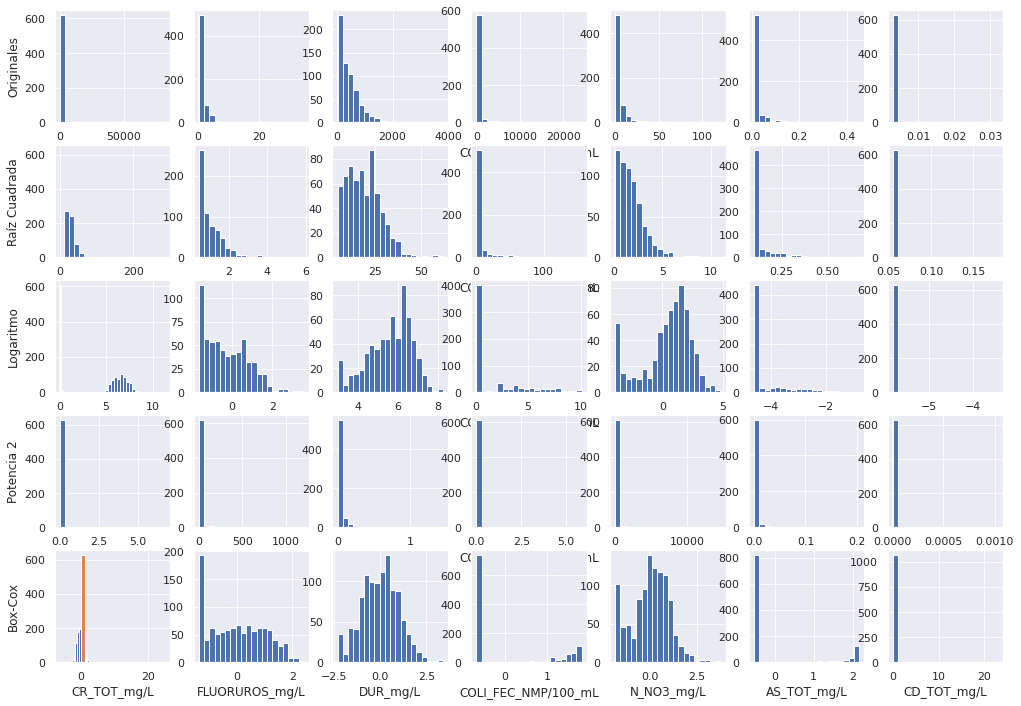

In [46]:
#Esto se aplica sólo para ver cuál es la mejor transformación para cada tipo de variable
variables_a_transformar = Numeric_Columns_List

num_iterations = (int(len(variables_a_transformar)))

Plotdf = pd.DataFrame(Rawdf)
Plotdf.dropna(inplace=True)

print('Tipos de variables: ')
print(Plotdf.dtypes)
print('distribuciones de las variables: ')

sns.set(rc={'figure.figsize':(17,12)})
fig, axes = plt.subplots(5, 8)    

for k in range(0,num_iterations):       
     # Datos originales ---------------------------------------------------------
    plt.subplot(5,7,k+1) 

    Transf0 = Plotdf[variables_a_transformar[k]]        #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
    plt.hist(Transf0,bins=20)                   #  En este línea agrega el comando para obtener el histograma de Transf0 con 20 barras (bins).

    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Originales')
    
    # Datos transformados con raíz cuadrada ------------------------------------
    plt.subplot(5,7,k+8)    

    Transf1 = np.sqrt(Plotdf[variables_a_transformar[k]] )          #  En esta línea se debe aplicar la raíz cuadrada a los valores de cada variable "k" sin transformar.
    plt.hist(Transf1,bins=20)                    #  En este línea agrega el comando para obtener el histograma de Transf1 con 20 barras (bins).

    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Raíz Cuadrada')
    
    # Datos transformados con logaritmo natural --------------------------------
    plt.subplot(5,7,k+15)     

    Transf2 = np.log(Plotdf[variables_a_transformar[k]] )          #  En esta línea se debe aplicar el logaritmo natural a los valores de cada variable "k" sin transformar.
    plt.hist(Transf2,bins=20)                     #  En este línea agrega el comando para obtener el histograma de Transf2 con 20 barras (bins).

    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Logaritmo')
    
    # Datos transformados con la potencia de 2 ---------------------------------
    plt.subplot(5,7,k+22)

    Transf3 = np.square(Plotdf[variables_a_transformar[k]] )          #  En esta línea debes elevar al cuadrado los valores de cada variable "k" sin transformar.
    plt.hist(Transf3,bins=20)                   #  En este línea agrega el comando para obtener el histograma de Transf3 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Potencia 2')
    
    # Datos transformados con Box-Cox ------------------------------------------
    plt.subplot(5,7,k+29)

    Transf4 = power_transform(np.array(Rawdf[variables_a_transformar[k]]).reshape(-1,1),method="box-cox")          #  En esta línea se debe aplicar la transformación Box-Cox a los valores de cada variable "k" sin transformar.
    plt.hist(Transf4,bins=20)                    #En este línea agrega el comando para obtener el histograma de Transf4 con 20 barras (bins).

    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Box-Cox')

    # TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
    ################################################################################################################

plt.show()

In [47]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Posteriomente se implementan herramientas de visualización para obtener el primer overview de la distribucón de nuestros datos a los datos de agua subterránea a largo del país.

In [48]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

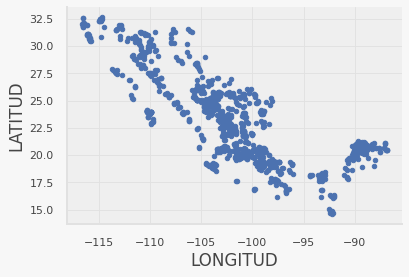

In [70]:
latlong=df[["LONGITUD","LATITUD"]]
latlong.plot.scatter( "LONGITUD","LATITUD")

In [71]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [72]:
df["Coordinates"] = list(zip(df.LONGITUD, df.LATITUD))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Coordinates
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.0221 22.20887)
1,DLAGU6516,POZO R013 CAADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.20075 21.99958)
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,POINT (-102.28801 22.36685)
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.29449 22.18435)
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,POINT (-110.2448 23.45138)


In [73]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Coordinates
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.02210 22.20887)
1,DLAGU6516,POZO R013 CAADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.20075 21.99958)
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,POINT (-102.28801 22.36685)
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.29449 22.18435)
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,POINT (-110.24480 23.45138)


In [74]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [75]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

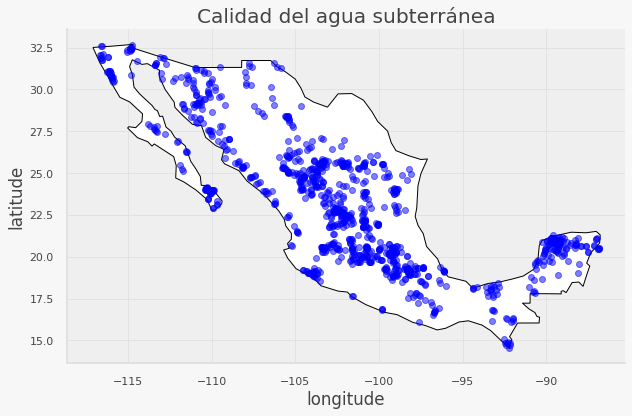

In [76]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='blue', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Calidad del agua subterránea')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

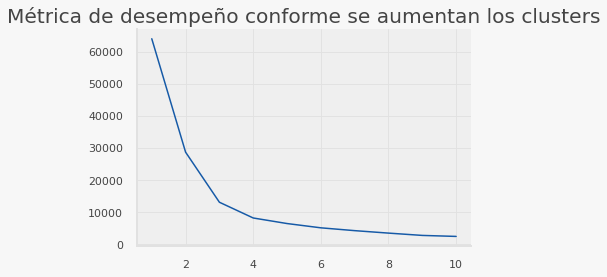

In [77]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 10000)
    kmeans.fit(latlong)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Métrica de desempeño conforme se aumentan los clusters')
plt.show()

Se hace un análisis de clústers óptimos, obteniendo la métrica de distancia conforme vamos iterando los clusters, obteniendo así como conclusión dado el gráfico de codo observado, que el número óptimo de clusters es 4 (se realizaron otras pruebas variendo el número de clústers y se corroboró)

In [78]:
clustering = KMeans(n_clusters = 4, max_iter= 10000)
clustering.fit(latlong)

Optimal_Centers = pd.DataFrame(clustering.cluster_centers_)

print('Los clusters óptimos se encuentran en las siguientes coordenadas:\n ', clustering.cluster_centers_)

latlong['Cluster'] = clustering.labels_

print('-----------------------------------------------------------')

print('Esta es la lista de todas las coordenadas y su cluster perteneciente')
latlong

Los clusters óptimos se encuentran en las siguientes coordenadas:
  [[ -90.09271578   19.6502625 ]
 [-103.66584078   24.77478631]
 [-100.2286467    20.26114492]
 [-111.44537124   28.7340166 ]]
-----------------------------------------------------------
Esta es la lista de todas las coordenadas y su cluster perteneciente


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LONGITUD,LATITUD,Cluster
0,-102.02210,22.20887,2
1,-102.20075,21.99958,2
2,-102.28801,22.36685,1
3,-102.29449,22.18435,2
4,-110.24480,23.45138,3
...,...,...,...
1063,-99.54191,24.76036,1
1064,-99.70099,24.78280,1
1065,-99.82249,25.55197,1
1066,-100.32683,24.80118,1


Con el análisis de clusters óptimos encontramos que el número de clusters óptimos es 4 y por lo tanto volvemos a hacer un análisis de Kmeans para poder encontrar las coordenadas óptimas que separan a cada grupo de datos dado ese números de clusters, de igual manera se agrega a la matriz original el grupo en el cuál pertenecen los clusters

In [79]:
Optimal_Centers

,0,1
0,-90.092716,19.650263
1,-103.665841,24.774786
2,-100.228647,20.261145
3,-111.445371,28.734017


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


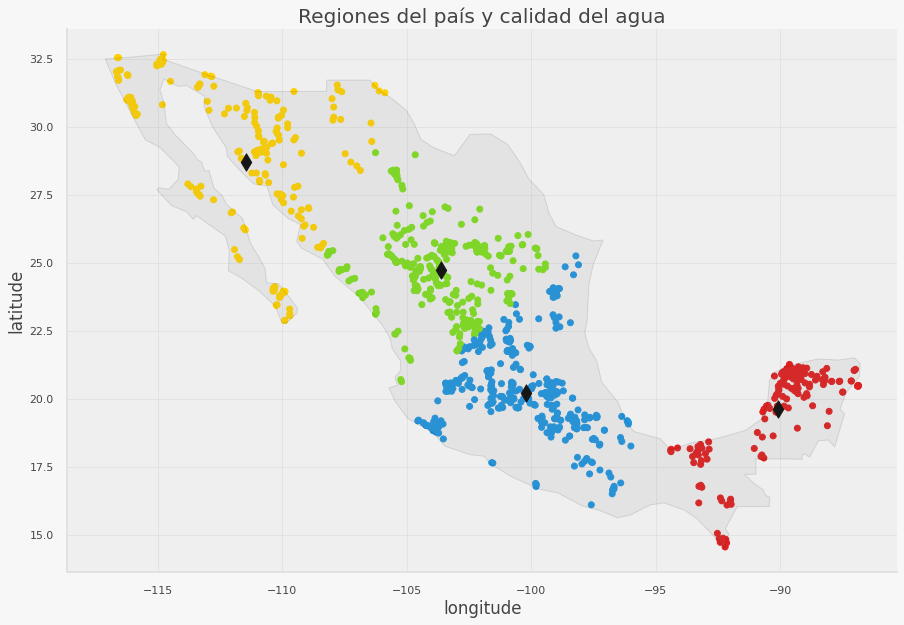

In [97]:
fig, gax = plt.subplots(figsize=(10,10))


colors = ['#DF2020', '#81DF20', '#2095DF','#FFD200']
latlong['colormap'] = latlong.Cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})


Lat = pd.DataFrame(latlong['LATITUD'])
Long = pd.DataFrame(latlong['LONGITUD'])
Clus = pd.DataFrame(latlong['colormap'])

plt.scatter(latlong.LONGITUD, latlong.LATITUD, c=  latlong.colormap)
plt.scatter(Optimal_Centers[0],Optimal_Centers[1], marker = 'd', s=150, color = '#0A0A0A')
plt.gcf().set_size_inches((15, 10))

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Regiones del país y calidad del agua')


# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='grey',alpha = 0.1)

plt.show()

Procedemos a realizar un análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.
Para esto usaremos el dataframe "latlongsema", el cual contine los datos del Cluster asignado y el SEMAFORO al que pertenecen, cabe mencionar que se seleccionó SEMAFORO como la columna de apoyo para medir la calidad del agua ya que en la documentación de la CONAGUA se le describe como un parametro que "Indica el nivel de contaminacion de acuerdo a los contaminantes presentes".
Los valores de SEMAFORO son VERDE, AMARILLO y ROJO respectivamente, por lo que para poder analizarlos cuantitativamente los remplazaremos por 1, 2 y 3 respectivamente.  

In [98]:
latlongsema=df[["LONGITUD","LATITUD","SEMAFORO"]]

#Esto es para remplazar los valores object por numéricos.
latlongsema.replace('Verde',1, inplace= True)
latlongsema.replace('Rojo',3, inplace= True)
latlongsema.replace('Amarillo',2, inplace= True)


clustering = KMeans(n_clusters = 4, max_iter= 10000)
clustering.fit(latlongsema)

Optimal_Centers = pd.DataFrame(clustering.cluster_centers_)



latlongsema['Cluster'] = clustering.labels_


latlongsema.head

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


<bound method NDFrame.head of        LONGITUD   LATITUD  SEMAFORO  Cluster
0    -102.02210  22.20887         1        3
1    -102.20075  21.99958         1        3
2    -102.28801  22.36685         3        1
3    -102.29449  22.18435         1        3
4    -110.24480  23.45138         3        2
...         ...       ...       ...      ...
1063  -99.54191  24.76036         3        1
1064  -99.70099  24.78280         3        1
1065  -99.82249  25.55197         3        1
1066 -100.32683  24.80118         1        1
1067 -100.73302  25.09380         1        1

[1068 rows x 4 columns]>

Ya que tenemos nuestro nuevo DF llamado 'latlongsema' proceemos a hacer un análisis de correlación, entre la columna SEMAFORO y Cluster, obteniendo un valor de -0.06969, valor que indica que no existe una correlación entre ambas variables.

In [139]:
data = latlongsema[['Cluster','SEMAFORO']]
correlation = data.corr(method='pearson')
print(correlation)

           Cluster  SEMAFORO
Cluster   1.000000 -0.069695
SEMAFORO -0.069695  1.000000


Procedemos a verificar dicho resultado con un análisis visual, en donde con ayuda de una Box PLot, obtenemos que no hay un patron visible de distribución en los datos.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


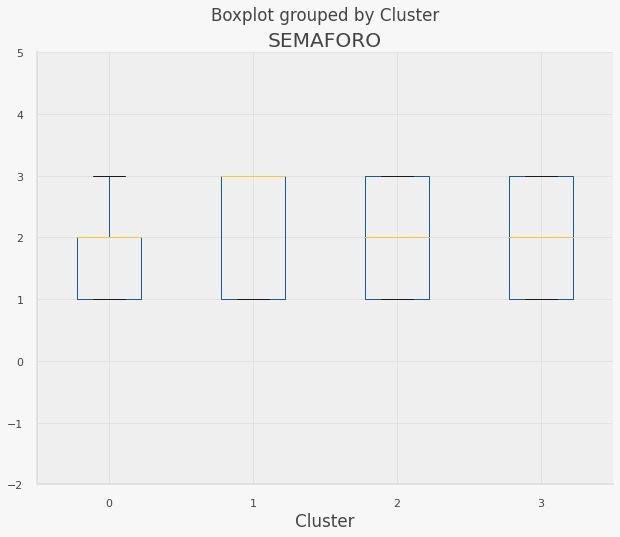

In [99]:

fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
plt.ylim(-2,5)
latlongsema.boxplot(column=['SEMAFORO'], by='Cluster', ax=ax)

In [167]:
C0_S1=latlongsema[(latlongsema.Cluster == 0) & (latlongsema.SEMAFORO == 1)].count()
C0_S2=latlongsema[(latlongsema.Cluster == 0) & (latlongsema.SEMAFORO == 2)].count()
C0_S3=latlongsema[(latlongsema.Cluster == 0) & (latlongsema.SEMAFORO == 3)].count()
C0_=latlongsema[(latlongsema.Cluster == 0)].count()
C0_=C0_.Cluster
C0_S1=C0_S1.Cluster
C0_S2=C0_S2.Cluster
C0_S3=C0_S3.Cluster
print("En el Cluster 0 hay",C0_,"fuentes de agua subterránea")
print(C0_S1,"VERDES en el semaforo")
print(C0_S2,"AMARILLOS en el semaforo")
print(C0_S3,"ROJOS en el semaforo")

print(" ")

C1_S1=latlongsema[(latlongsema.Cluster == 1) & (latlongsema.SEMAFORO == 1)].count()
C1_S2=latlongsema[(latlongsema.Cluster == 1) & (latlongsema.SEMAFORO == 2)].count()
C1_S3=latlongsema[(latlongsema.Cluster == 1) & (latlongsema.SEMAFORO == 3)].count()
C1_=latlongsema[(latlongsema.Cluster == 1)].count()
C1_=C1_.Cluster
C1_S1=C1_S1.Cluster
C1_S2=C1_S2.Cluster
C1_S3=C1_S3.Cluster
print("En el Cluster 1 hay",C1_,"fuentes de agua subterránea")
print(C1_S1,"VERDES en el semaforo")
print(C1_S2,"AMARILLOS en el semaforo")
print(C1_S3,"ROJOS en el semaforo")

print(" ")

C2_S1=latlongsema[(latlongsema.Cluster == 2) & (latlongsema.SEMAFORO == 1)].count()
C2_S2=latlongsema[(latlongsema.Cluster == 2) & (latlongsema.SEMAFORO == 2)].count()
C2_S3=latlongsema[(latlongsema.Cluster == 2) & (latlongsema.SEMAFORO == 3)].count()
C2_=latlongsema[(latlongsema.Cluster == 2)].count()
C2_=C2_.Cluster
C2_S1=C2_S1.Cluster
C2_S2=C2_S2.Cluster
C2_S3=C2_S3.Cluster
print("En el Cluster 2 hay",C2_,"fuentes de agua subterránea")
print(C2_S1,"VERDES en el semaforo")
print(C2_S2,"AMARILLOS en el semaforo")
print(C2_S3,"ROJOS en el semaforo")

print(" ")

C3_S1=latlongsema[(latlongsema.Cluster == 3) & (latlongsema.SEMAFORO == 1)].count()
C3_S2=latlongsema[(latlongsema.Cluster == 3) & (latlongsema.SEMAFORO == 2)].count()
C3_S3=latlongsema[(latlongsema.Cluster == 3) & (latlongsema.SEMAFORO == 3)].count()
C3_=latlongsema[(latlongsema.Cluster == 3)].count()
C3_=C3_.Cluster
C3_S1=C3_S1.Cluster
C3_S2=C3_S2.Cluster
C3_S3=C3_S3.Cluster
print("En el Cluster 3 hay",C3_,"fuentes de agua subterránea")
print(C3_S1,"VERDES en el semaforo")
print(C3_S2,"AMARILLOS en el semaforo")
print(C3_S3,"ROJOS en el semaforo")

En el Cluster 0 hay 162 fuentes de agua subterránea
63 VERDES en el semaforo
85 AMARILLOS en el semaforo
14 ROJOS en el semaforo
 
En el Cluster 1 hay 327 fuentes de agua subterránea
97 VERDES en el semaforo
39 AMARILLOS en el semaforo
191 ROJOS en el semaforo
 
En el Cluster 2 hay 206 fuentes de agua subterránea
94 VERDES en el semaforo
47 AMARILLOS en el semaforo
65 ROJOS en el semaforo
 
En el Cluster 3 hay 373 fuentes de agua subterránea
180 VERDES en el semaforo
76 AMARILLOS en el semaforo
117 ROJOS en el semaforo


In [188]:
print((round(((C0_S1/C0_)*100),2)),"% del C0 pertenece al Semaforo VERDE")
print((round(((C0_S2/C0_)*100),2)),"% del C0 pertenece al Semaforo AMARILLO")
print((round(((C0_S3/C0_)*100),2))," % del C0 pertenece al Semaforo ROJO")
print(" ")
print((round(((C1_S1/C1_)*100),2)),"% del C1 pertenece al Semaforo VERDE")
print((round(((C1_S2/C1_)*100),2)),"% del C1 pertenece al Semaforo AMARILLO")
print((round(((C1_S3/C1_)*100),2)),"% del C1 pertenece al Semaforo ROJO")
print(" ")
print((round(((C2_S1/C2_)*100),2)),"% del C2 pertenece al Semaforo VERDE")
print((round(((C2_S2/C2_)*100),2)),"% del C2 pertenece al Semaforo AMARILLO")
print((round(((C2_S3/C2_)*100),2)),"% del C2 pertenece al Semaforo ROJO")
print(" ")
print((round(((C3_S1/C3_)*100),2)),"% del C3 pertenece al Semaforo VERDE")
print((round(((C3_S2/C3_)*100),2)),"% del C3 pertenece al Semaforo AMARILLO")
print((round(((C3_S3/C3_)*100),2)),"% del C3 pertenece al Semaforo ROJO")

38.89 % del C0 pertenece al Semaforo VERDE
52.47 % del C0 pertenece al Semaforo AMARILLO
8.64  % del C0 pertenece al Semaforo ROJO
 
29.66 % del C1 pertenece al Semaforo VERDE
11.93 % del C1 pertenece al Semaforo AMARILLO
58.41 % del C1 pertenece al Semaforo ROJO
 
45.63 % del C2 pertenece al Semaforo VERDE
22.82 % del C2 pertenece al Semaforo AMARILLO
31.55 % del C2 pertenece al Semaforo ROJO
 
48.26 % del C3 pertenece al Semaforo VERDE
20.38 % del C3 pertenece al Semaforo AMARILLO
31.37 % del C3 pertenece al Semaforo ROJO


Finalmente usamos un gráfico de barras en donde comparamos los Clusters 0, 1, 2 y 3 con los valores de semaforo VERDE, AMARILLO Y ROJO, y con la extracción de valores realizada anteriormente podemos decir que se confirma lo observado en el Blox Plot, pues la distrubución de los datos en el C0 predomina en el semaforo Verde y Amarillo, por otro lado más del 50% de los datos en el C1 pertenece al semaforo rojo, se podría decir que en esta zona los datos tiene una mayor tendencia presentar un alto nivel de contaminación, sin embargo no hay un relación considerable entre la calidad del agua subterránea y su localización.

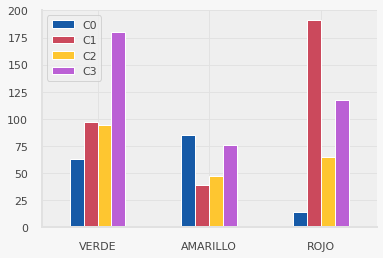

In [137]:
C0 = [C0_S1, C0_S2, C0_S3]
C1 = [C1_S1, C1_S2, C1_S3]
C2 = [C2_S1, C2_S2, C2_S3]
C3 = [C3_S1, C3_S2, C3_S3]
index = ['VERDE', 'AMARILLO', 'ROJO']
df = pd.DataFrame({'C0': C0,'C1': C1,'C2': C2,'C3': C3}, index=index)
ax = df.plot.bar(rot=0)
